<a href="https://colab.research.google.com/github/sandhya04-coder/brain_tumor_prediction/blob/main/brain_tumor_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES



1.Here we are using os for file manipulation & navigation.

2.python imaging library (pil) is used for image manipulation.

3.numpy is the python library used for calculation,manipulation of data and array

4.pandas are used for data handling ,most importantly reading the dataset and conversion into data frames

5.matplotlib and seaborn are mainly used for data visualisation

6.glob is used for retrieving file paths using patterns

7.sk learn is used for splitting data into training and testing data,also for evaluation purposes

8.tensorflow and keras are mainly used here for model training and building

In [ ]:

import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

DATA PREPROCESSING


loading data


the two functions below are used for creating dataframes which contains the classes of the tumor along with the file path for the tumors for train and test data respectively.

In [ ]:
def train_df(tr_path):
    classes, class_paths = zip(*[(label, os.path.join(tr_path, label, image))
                                 for label in os.listdir(tr_path) if os.path.isdir(os.path.join(tr_path, label))
                                 for image in os.listdir(os.path.join(tr_path, label))])

    tr_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return tr_df

In [ ]:
def test_df(ts_path):
    classes, class_paths = zip(*[(label, os.path.join(ts_path, label, image))
                                 for label in os.listdir(ts_path) if os.path.isdir(os.path.join(ts_path, label))
                                 for image in os.listdir(os.path.join(ts_path, label))])

    ts_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return ts_df

here we are using the shutil library for extracting the dataset that is downloaded from kaggle in zip format.

In [ ]:
#import shutil

#zip_path = "/content/archive(6).zip"  # Path to your zip file
#extract_to = "brain-tumor-mri-dataset"  # Directory to extract

#import zipfile

#if zipfile.is_zipfile(zip_path):
 #   print("Valid ZIP file ✅")
#else:
#    print("Not a ZIP file ❌")
#import shutil
#shutil.unpack_archive(zip_path, extract_to)



#print("Extraction completed!")


In [ ]:
import shutil
zip_path = "/content/archive(6).zip"  # Path to your zip file
extract_to = "brain-tumor-mri-dataset"
shutil.unpack_archive(zip_path, extract_to)

In [ ]:


tr_df = train_df('brain-tumor-mri-dataset/Training')



In [ ]:
tr_df

,Class Path,Class
0,brain-tumor-mri-dataset/Training/notumor/Tr-no...,notumor
1,brain-tumor-mri-dataset/Training/notumor/Tr-no...,notumor
2,brain-tumor-mri-dataset/Training/notumor/Tr-no...,notumor
3,brain-tumor-mri-dataset/Training/notumor/Tr-no...,notumor
4,brain-tumor-mri-dataset/Training/notumor/Tr-no...,notumor
...,...,...
5707,brain-tumor-mri-dataset/Training/meningioma/Tr...,meningioma
5708,brain-tumor-mri-dataset/Training/meningioma/Tr...,meningioma
5709,brain-tumor-mri-dataset/Training/meningioma/Tr...,meningioma
5710,brain-tumor-mri-dataset/Training/meningioma/Tr...,meningioma


In [ ]:
ts_df = test_df('brain-tumor-mri-dataset/Testing')





In [ ]:
ts_df

,Class Path,Class
0,brain-tumor-mri-dataset/Testing/notumor/Te-no_...,notumor
1,brain-tumor-mri-dataset/Testing/notumor/Te-no_...,notumor
2,brain-tumor-mri-dataset/Testing/notumor/Te-no_...,notumor
3,brain-tumor-mri-dataset/Testing/notumor/Te-no_...,notumor
4,brain-tumor-mri-dataset/Testing/notumor/Te-no_...,notumor
...,...,...
1306,brain-tumor-mri-dataset/Testing/meningioma/Te-...,meningioma
1307,brain-tumor-mri-dataset/Testing/meningioma/Te-...,meningioma
1308,brain-tumor-mri-dataset/Testing/meningioma/Te-...,meningioma
1309,brain-tumor-mri-dataset/Testing/meningioma/Te-...,meningioma


in the above two cells we are calling the train test function to get the organised dataframes

IN THE TRAINING DATA HOW MUCH MRI SCANS OF EACH CATEGORY REPRESENTATION USING PLOT AND WE ARE USING THE MATPLOTLIB AND SEABORN LIBRARY FOR THE VISUALISATION.

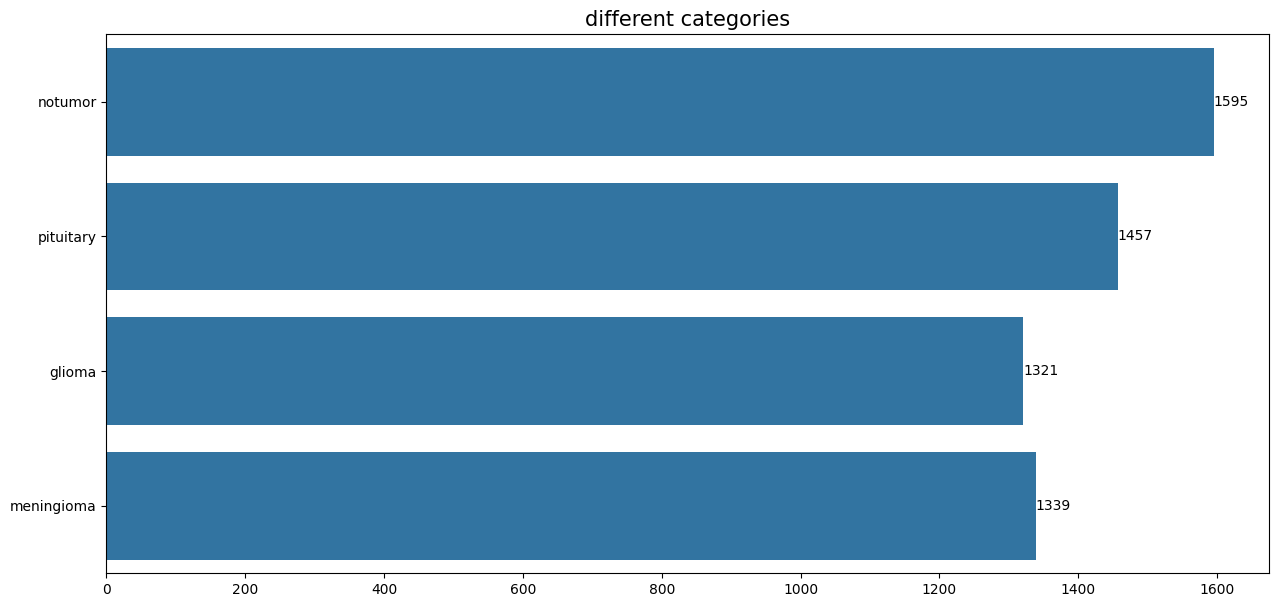

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df , y=tr_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('different categories', fontsize=15)
ax.bar_label(ax.containers[0])
plt.show()

REPRESENTING TESTING DATA JUST LIKE WE REPRESENTED THE TRAINING ,WHICH PLOTS THE NUMBER AND CLASSES OF TUMORS.


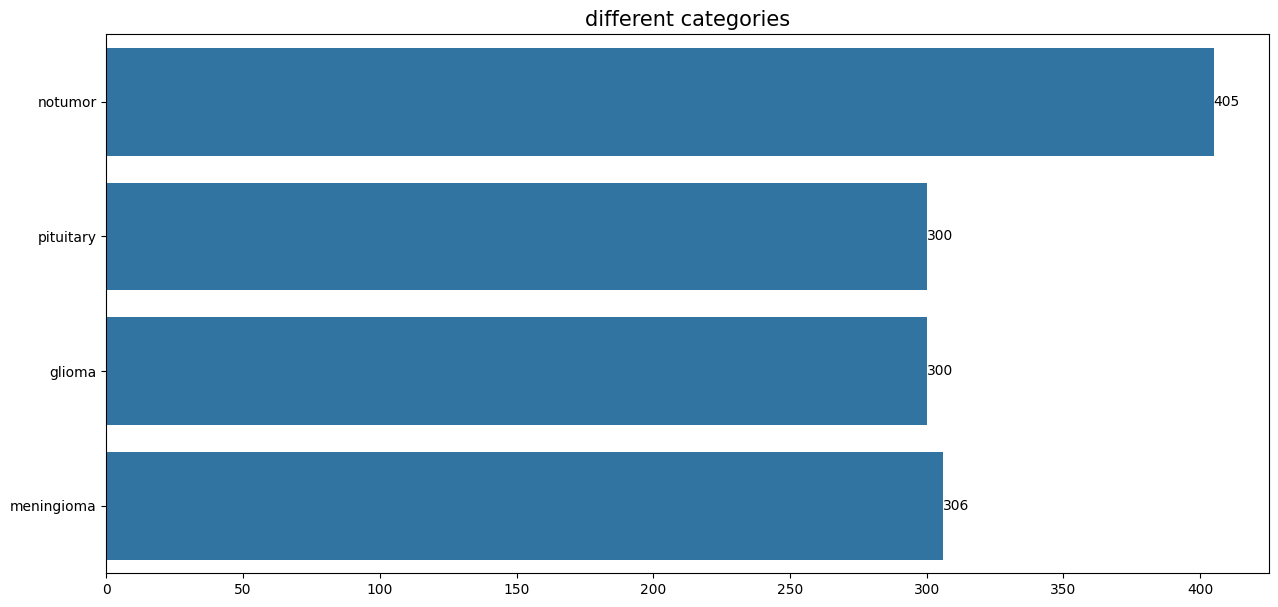

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df , y=ts_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('different categories', fontsize=15)
ax.bar_label(ax.containers[0])
plt.show()

here we are dividing the test data set into valid data set and test data set such thatboth the classes contain 50% of data and they are equally balanced,this method is used for hyper parameter tuning,where valid data is used during training to check overfitting whereas test data is used for testing purpose only after training.

In [ ]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, random_state=20, stratify=ts_df['Class'])

In [ ]:
valid_df

,Class Path,Class
991,brain-tumor-mri-dataset/Testing/glioma/Te-gl_0...,glioma
1023,brain-tumor-mri-dataset/Testing/meningioma/Te-...,meningioma
466,brain-tumor-mri-dataset/Testing/pituitary/Te-p...,pituitary
1078,brain-tumor-mri-dataset/Testing/meningioma/Te-...,meningioma
814,brain-tumor-mri-dataset/Testing/glioma/Te-gl_0...,glioma
...,...,...
764,brain-tumor-mri-dataset/Testing/glioma/Te-gl_0...,glioma
254,brain-tumor-mri-dataset/Testing/notumor/Te-no_...,notumor
978,brain-tumor-mri-dataset/Testing/glioma/Te-gl_0...,glioma
1199,brain-tumor-mri-dataset/Testing/meningioma/Te-...,meningioma


here we are using the keras for image processing and augmentation which will make the images in proper format that can be used in deep learning model,the training data is augmented so that the generalization can be better whereas the testing data is not augmented so that the model can predict accurately.

In [ ]:
batch_size = 32
img_size = (299, 299)

_gen = ImageDataGenerator(rescale=1/255,
                          brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)


tr_gen = _gen.flow_from_dataframe(tr_df, x_col='Class Path',
                                  y_col='Class', batch_size=batch_size,
                                  target_size=img_size)

valid_gen = _gen.flow_from_dataframe(valid_df, x_col='Class Path',
                                     y_col='Class', batch_size=batch_size,
                                     target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                  y_col='Class', batch_size=16,
                                  target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


HERE WE ARE VISUALISING THE SAMPLE DATA
THE IMAGES ALONG WITH THE TUMOR CLASSES.

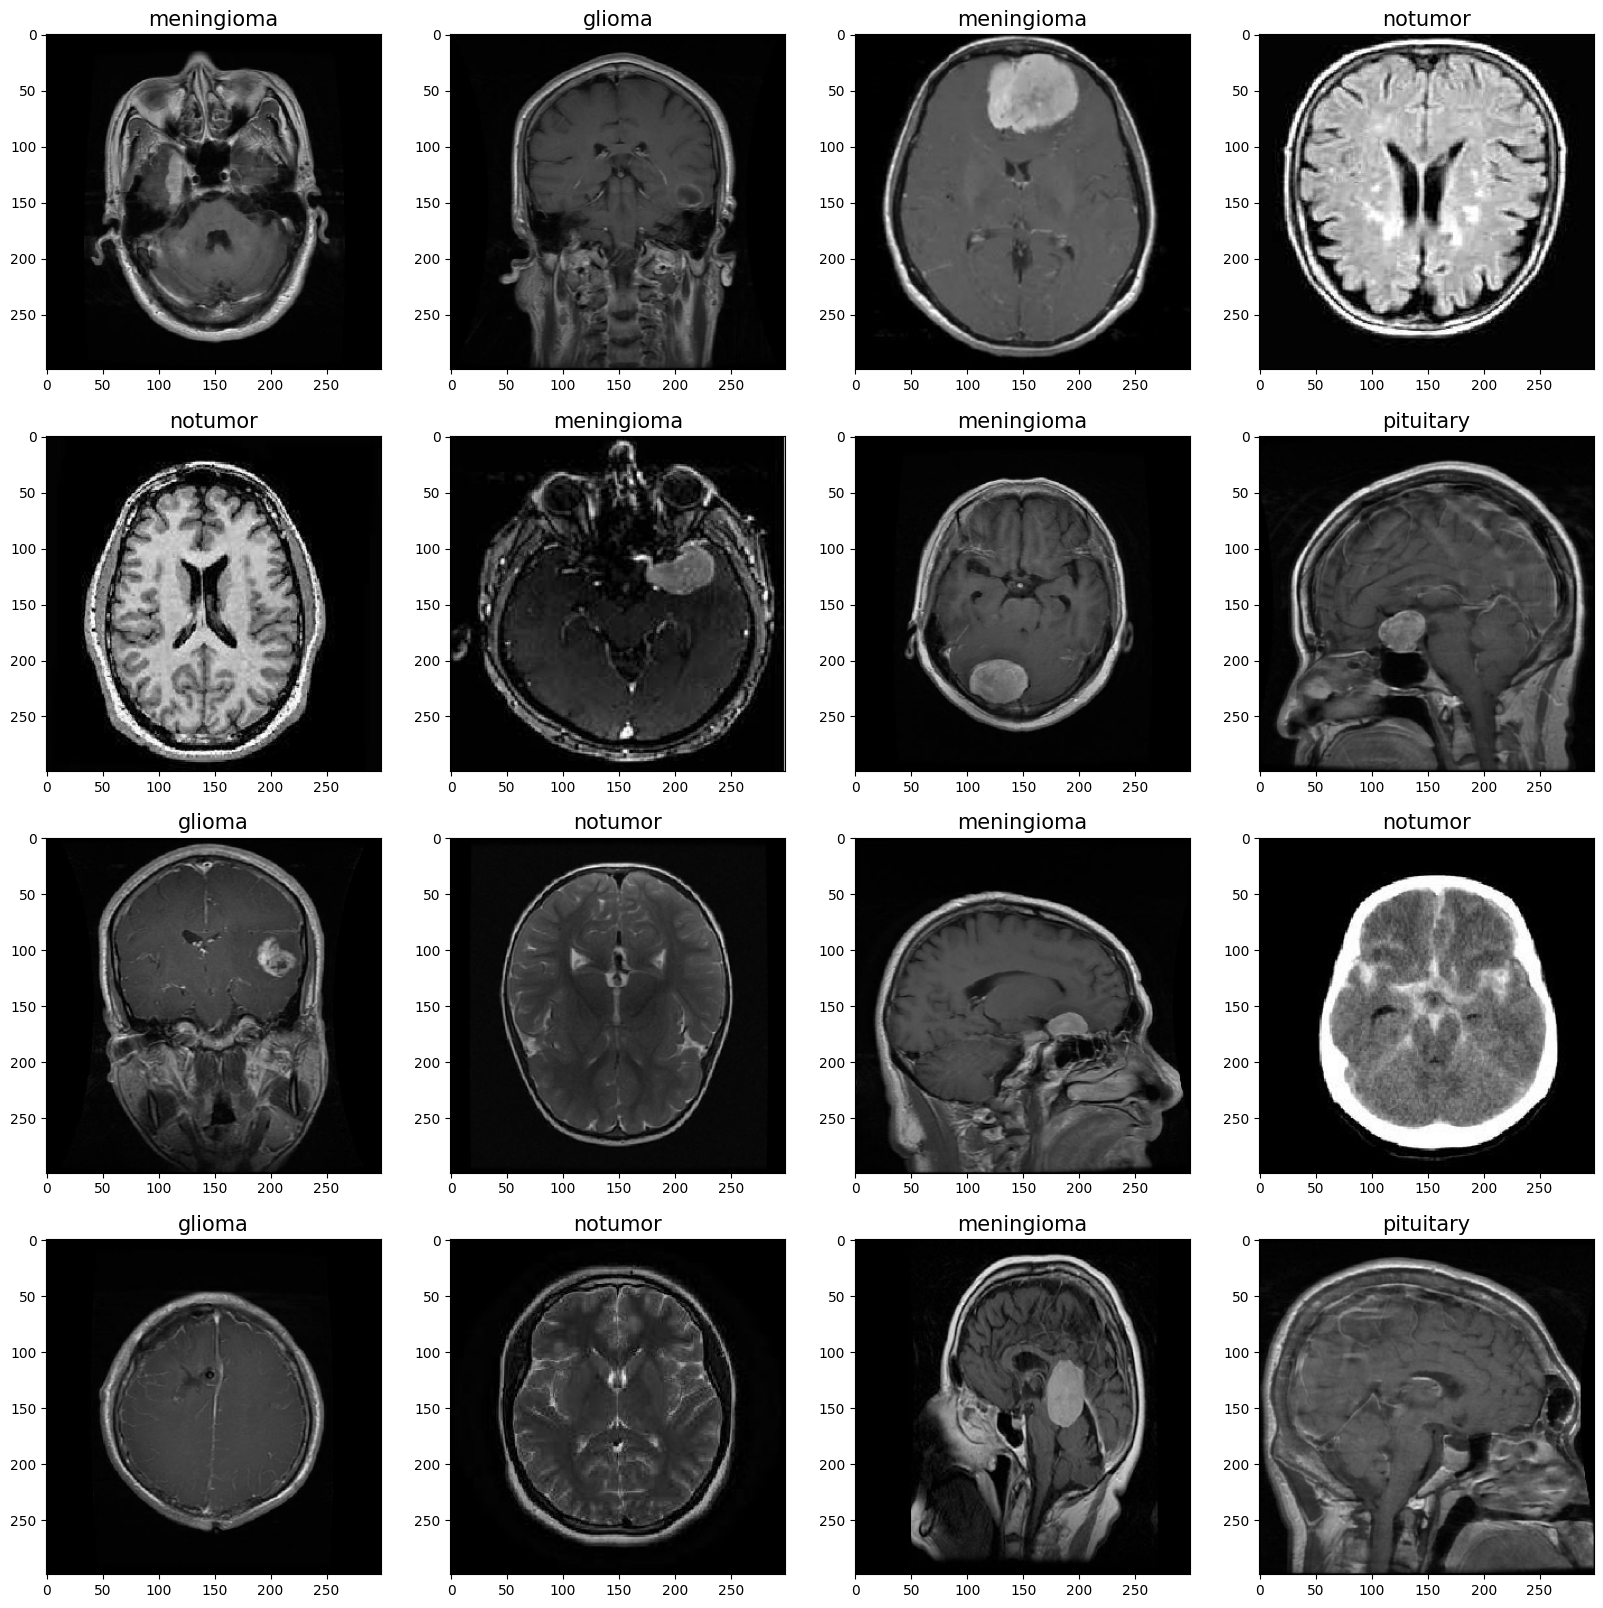

In [ ]:


class_dict = tr_gen.class_indices
classes = list(class_dict.keys())
images, labels = next(ts_gen)

plt.figure(figsize=(20, 20))

for i, (image, label) in enumerate(zip(images, labels)):
    plt.subplot(4,4, i + 1)
    plt.imshow(image)
    class_name = classes[np.argmax(label)]
    plt.title(class_name, color='k', fontsize=15)

plt.show()



USING DEEP LEARNING MODELS


In [ ]:
img_shape=(299,299,3)
base_model = tf.keras.applications.Xception(include_top= False, weights= "imagenet",
                            input_shape= img_shape, pooling= 'max')

# for layer in base_model.layers:
#     layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate= 0.3),
    Dense(64, activation= 'relu'),
    Dropout(rate= 0.25),
    Dense(4, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001),
              loss= 'categorical_crossentropy',
              metrics= ['accuracy',
                        Precision(),
                        Recall()])

model.summary()

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 2048)           │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,992,876 (80.08 MB)

 Trainable params: 20,938,348 (79.87 MB)

 Non-trainable params: 54,528 (213.00 KB)

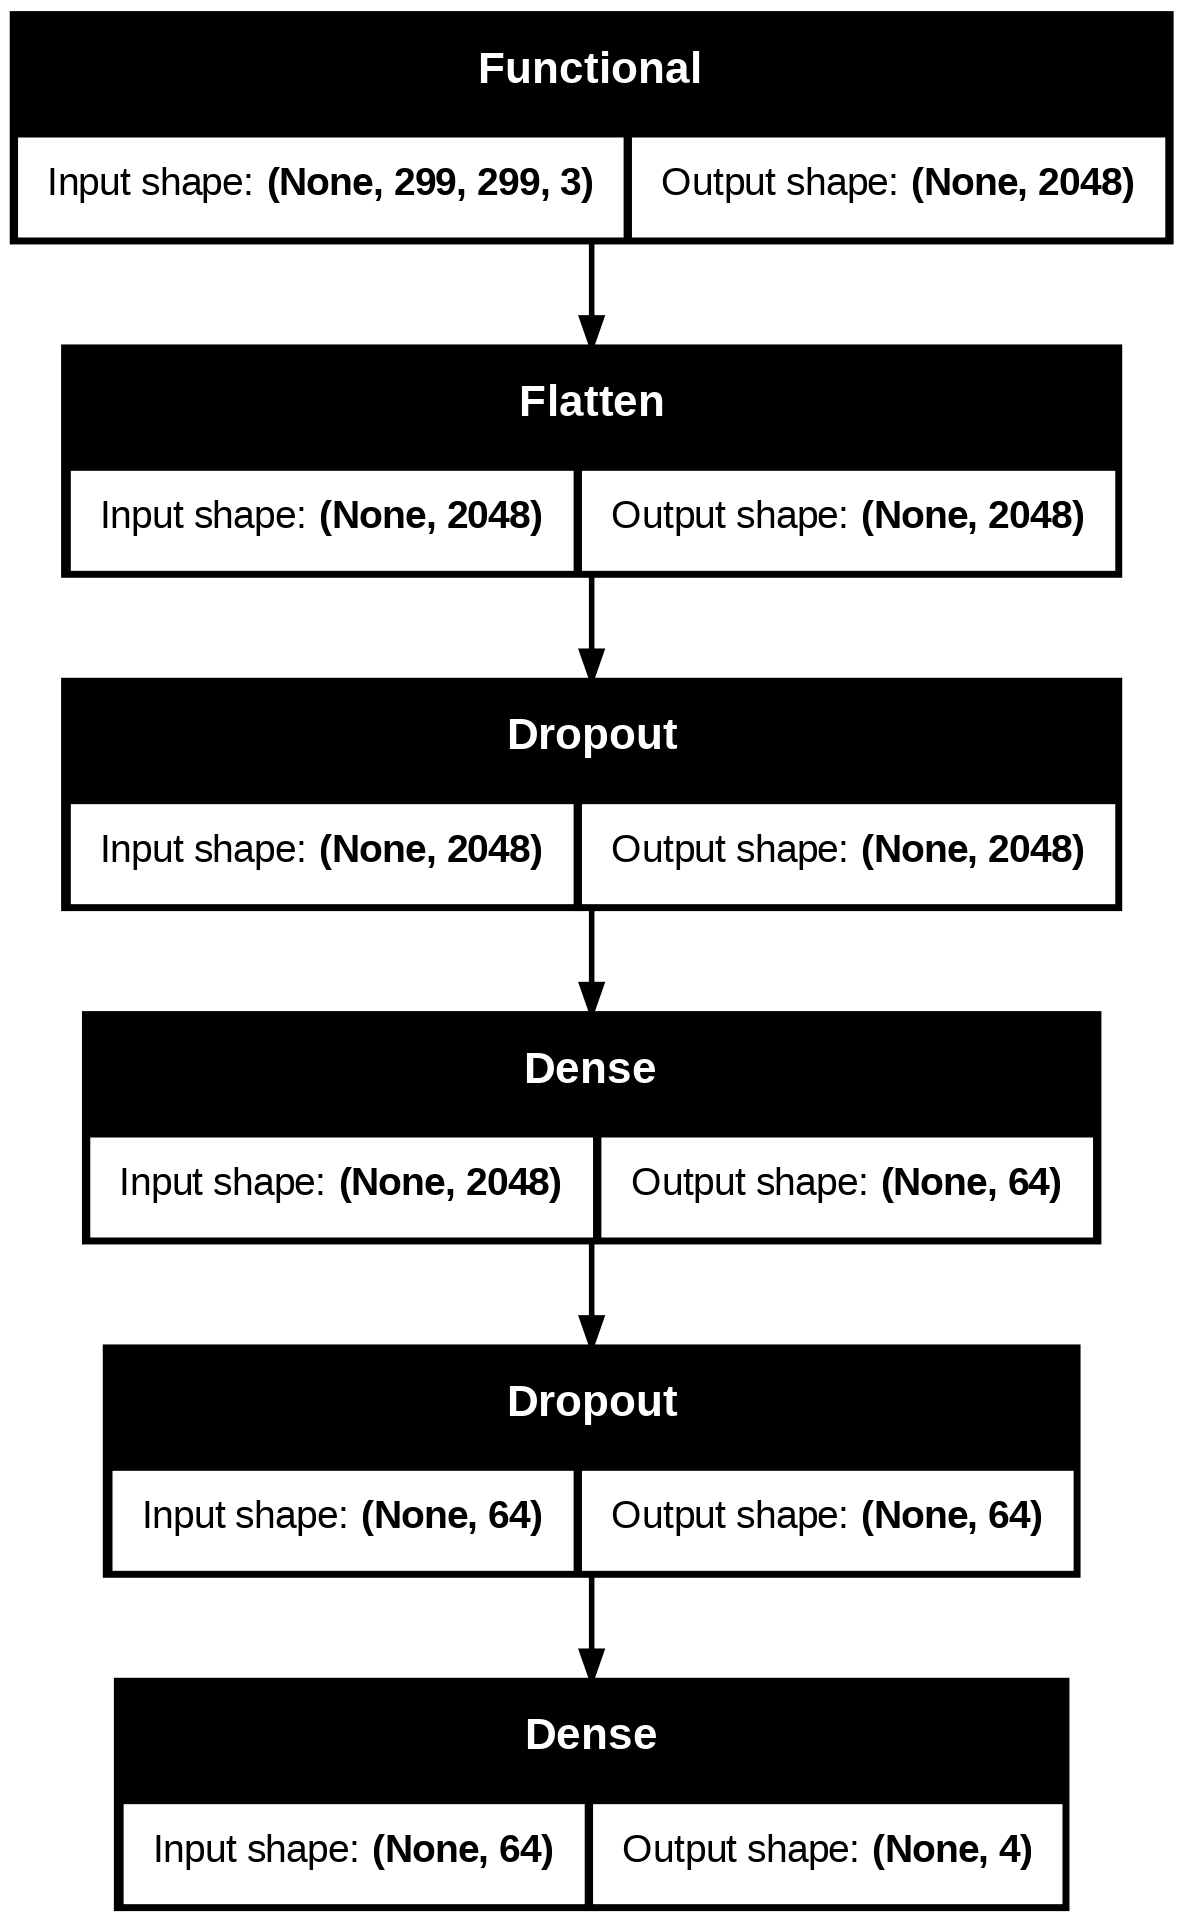

In [ ]:


tf.keras.utils.plot_model(model, show_shapes=True)



Training

In [ ]:


hist = model.fit(tr_gen,
                 epochs=8,
                 validation_data=valid_gen,
                 shuffle= False)



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/8
179/179 ━━━━━━━━━━━━━━━━━━━━ 10763s 60s/step - accuracy: 0.7952 - loss: 0.6119 - precision: 0.8561 - recall: 0.6990 - val_accuracy: 0.9557 - val_loss: 0.1516 - val_precision: 0.9584 - val_recall: 0.9496
Epoch 2/8
 11/179 ━━━━━━━━━━━━━━━━━━━━ 2:42:14 58s/step - accuracy: 0.9806 - loss: 0.0561 - precision: 0.9818 - recall: 0.9806

KeyboardInterrupt: 

In [ ]:


hist.history.keys()



NameError: name 'hist' is not defined

In [ ]:
model.save('brain_tumor_model.h5')


Visualisation of how the model is performing

In [ ]:



tr_acc = hist.history['accuracy']
tr_loss = hist.history['loss']
tr_per = hist.history['precision']
tr_recall = hist.history['recall']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']
val_per = hist.history['val_precision']
val_recall = hist.history['val_recall']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
index_precision = np.argmax(val_per)
per_highest = val_per[index_precision]
index_recall = np.argmax(val_recall)
recall_highest = val_recall[index_recall]

Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'Best epoch = {str(index_loss + 1)}'
acc_label = f'Best epoch = {str(index_acc + 1)}'
per_label = f'Best epoch = {str(index_precision + 1)}'
recall_label = f'Best epoch = {str(index_recall + 1)}'


plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')


plt.subplot(2, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(Epochs, tr_per, 'r', label='Precision')
plt.plot(Epochs, val_per, 'g', label='Validation Precision')
plt.scatter(index_precision + 1, per_highest, s=150, c='blue', label=per_label)
plt.title('Precision and Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(Epochs, tr_recall, 'r', label='Recall')
plt.plot(Epochs, val_recall, 'g', label='Validation Recall')
plt.scatter(index_recall + 1, recall_highest, s=150, c='blue', label=recall_label)
plt.title('Recall and Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()





NameError: name 'hist' is not defined

Evaluation

In [ ]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

  4/179 ━━━━━━━━━━━━━━━━━━━━ 41:15 14s/step - accuracy: 0.9772 - loss: 0.1044 - precision: 0.9771 - recall: 0.9688

KeyboardInterrupt: 

In [ ]:


preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)



 2/41 ━━━━━━━━━━━━━━━━━━━━ 4:10 6s/step

KeyboardInterrupt: 

In [ ]:


cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()



NameError: name 'y_pred' is not defined

In [ ]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

Testing the model

In [ ]:


def predict(img_path):
    import numpy as np
    import matplotlib.pyplot as plt
    from PIL import Image
    label = list(class_dict.keys())
    plt.figure(figsize=(12, 12))
    img = Image.open(img_path)
    resized_img = img.resize((299, 299))
    img = np.asarray(resized_img)
    img = np.expand_dims(img, axis=0)
    img = img / 255
    predictions = model.predict(img)
    probs = list(predictions[0])
    labels = label
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probs)
    plt.xlabel('Probability', fontsize=15)
    ax = plt.gca()
    ax.bar_label(bars, fmt = '%.2f')
    plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


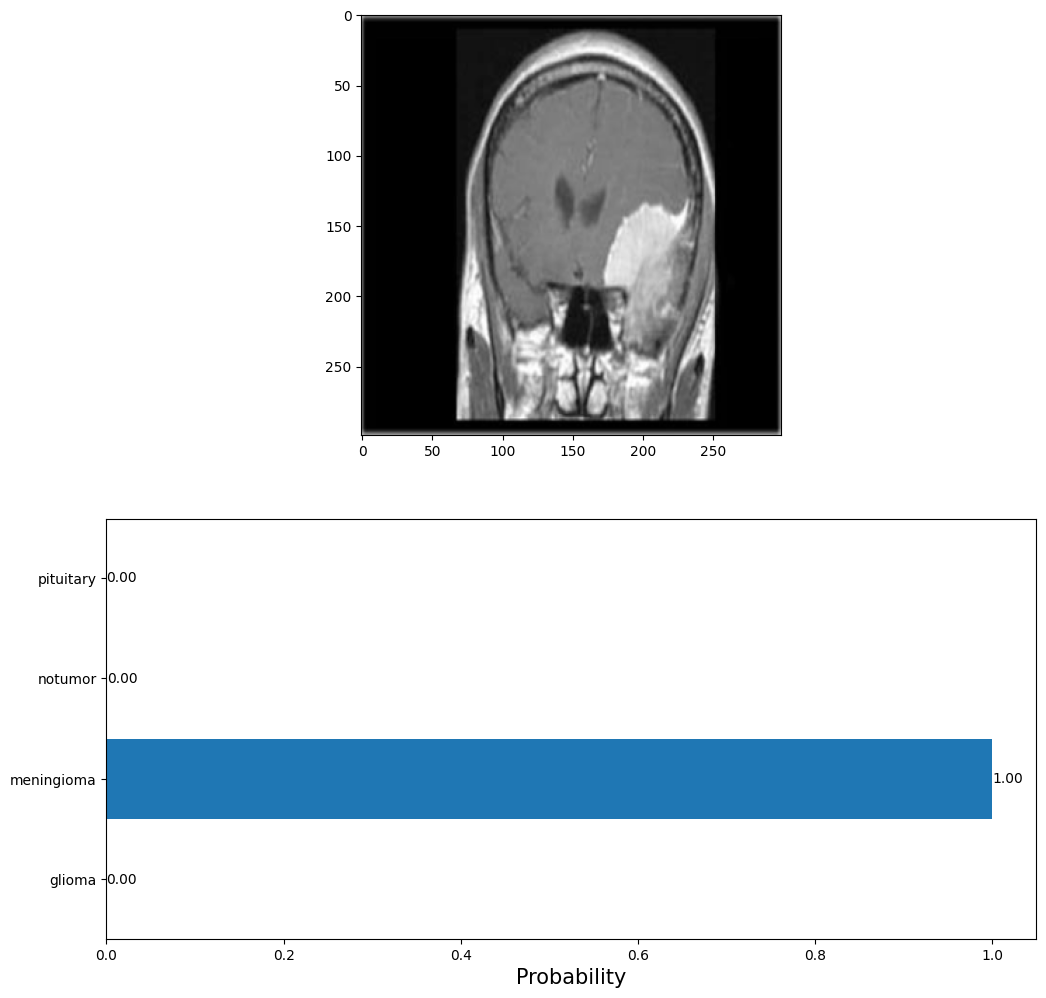

In [ ]:
predict('brain-tumor-mri-dataset/Testing/meningioma/Te-meTr_0000.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


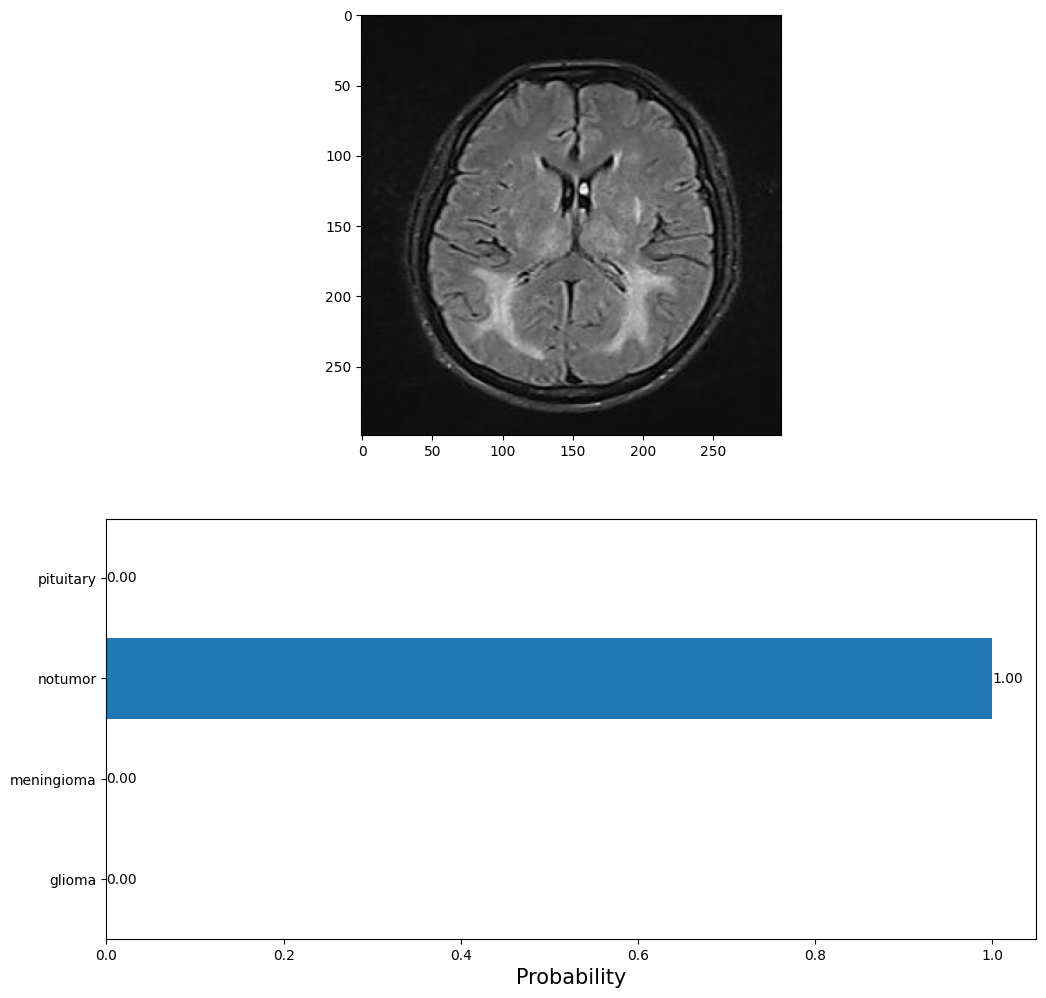

In [ ]:


predict('brain-tumor-mri-dataset/Testing/notumor/Te-noTr_0001.jpg')

